## Imports:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Load two different grayscale images:

In [2]:
def Load(image1, image2):
    img1 = cv2.imread(image1) 
    img2 = cv2.imread(image2)
    img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)   
    return img1_gray, img2_gray

## Resize images:

In [3]:
def Resize(img1, img2, image1_path, image2_path):
    # set a new width and height in pixels
    new_width = 1500
    new_height = 1500

    # size
    size = (new_width, new_height)

    # resize image
    output_size_change_img1 = cv2.resize(img1, size, interpolation = cv2.INTER_AREA)
    output_size_change_img2 = cv2.resize(img2, size, interpolation = cv2.INTER_AREA)
    
    new_name_change = 'After_Changed_Size_'
    
    image1_new_name = new_name_change + image1_path
    image2_new_name = new_name_change + image2_path

    img1_size_after = cv2.imwrite(image1_new_name, output_size_change_img1)
    img1_changed_size = cv2.imread(image1_new_name, 0)

    img2_size_after = cv2.imwrite(image2_new_name, output_size_change_img2)
    img2_changed_size = cv2.imread(image2_new_name, 0)
    return img1_changed_size, img2_changed_size

## Transform to frequency domain using Fourier:

In [4]:
def FourierTransform(img1_changed_size, img2_changed_size):
    img1_fft = np.fft.fftshift(np.fft.fft2(img1_changed_size))
    img2_fft = np.fft.fftshift(np.fft.fft2(img2_changed_size))
    return img1_fft, img2_fft

## Separate Magnitude and phase of images:

In [5]:
def SeparateMagnitudephase(img1_fft, img2_fft):
    img1_amplitude = np.sqrt(np.real(img1_fft) ** 2 + np.imag(img1_fft) ** 2)
    img1_phase = np.arctan2(np.imag(img1_fft), np.real(img1_fft))
    img2_amplitude = np.sqrt(np.real(img2_fft) ** 2 + np.imag(img2_fft) ** 2)
    img2_phase = np.arctan2(np.imag(img2_fft), np.real(img2_fft))
    return img1_amplitude, img1_phase, img2_amplitude, img2_phase

## Get image (Image Reconstruction) by computing --> [amplitude * exp(j * phase)]:

In [6]:
def  combination(img_amplitude, img_phase):
    # amplitude_phase
    combination = np.multiply(img_amplitude, np.exp(1j * img_phase))
    combination_real = np.real(np.fft.ifft2(combination))  # drop imagniary as they are around 1e-14
    return combination_real

## Plot The Image Reconstruction

In [7]:
def PlotImage(Reconstructed_Image):
    from PIL import Image
    # combined image has values < 0 and > 1, needs to be scaled.
    cv2.imwrite('savedOne.png', Reconstructed_Image)
    
    im2 = Image.open("savedOne.png")

    #show images
    im2.show()
    return im2

## Cut:

In [8]:
def crop_2d_img(image, x1, x2, y1, y2):
    max_height= image.shape[0]-1
    cutted_img = np.zeros_like(image)

    for x in range(x1,x2):
        for y in range(y1,y2):
            cutted_img[max_height-y,x] = image[max_height-y,x]
            
    return cutted_img

## Main Function(connection the functions together):

In [9]:
def Main(img1, img2, status, x1_amp, x2_amp, y1_amp, y2_amp, x1_phase, x2_phase, y1_phase, y2_phase): 
    combined_image = 0
    image1, image2 = Load(img1, img2)
    image1_Resized, image2_Resized = Resize(image1, image2, img1, img2)
    image1_Resized_fft, image2_Resized_fft = FourierTransform(image1_Resized, image2_Resized)
    img1_amplitude, img1_phase, img2_amplitude, img2_phase = SeparateMagnitudephase(image1_Resized_fft, image2_Resized_fft)
    
    if status == 0 :  # Amplitude from image 1 and Phase from image 2
        cutted_phase_img = crop_2d_img(img2_phase, x1_phase, x2_phase, y1_phase, y2_phase)
        cutted_amplitude_img = crop_2d_img((img1_amplitude), x1_amp, x2_amp, y1_amp, y2_amp)
        combined_image = combination(cutted_amplitude_img, cutted_phase_img)
        
    if status == 1 :  # Amplitude from image 2 and Phase from image 1
        cutted_phase_img = crop_2d_img(img1_phase, x1_phase, x2_phase, y1_phase, y2_phase)
        cutted_amplitude_img = crop_2d_img((img2_amplitude), x1_amp, x2_amp, y1_amp, y2_amp)
        combined_image = combination(cutted_amplitude_img, cutted_phase_img)
        
    plotted_image = PlotImage(combined_image)
    
    return plotted_image

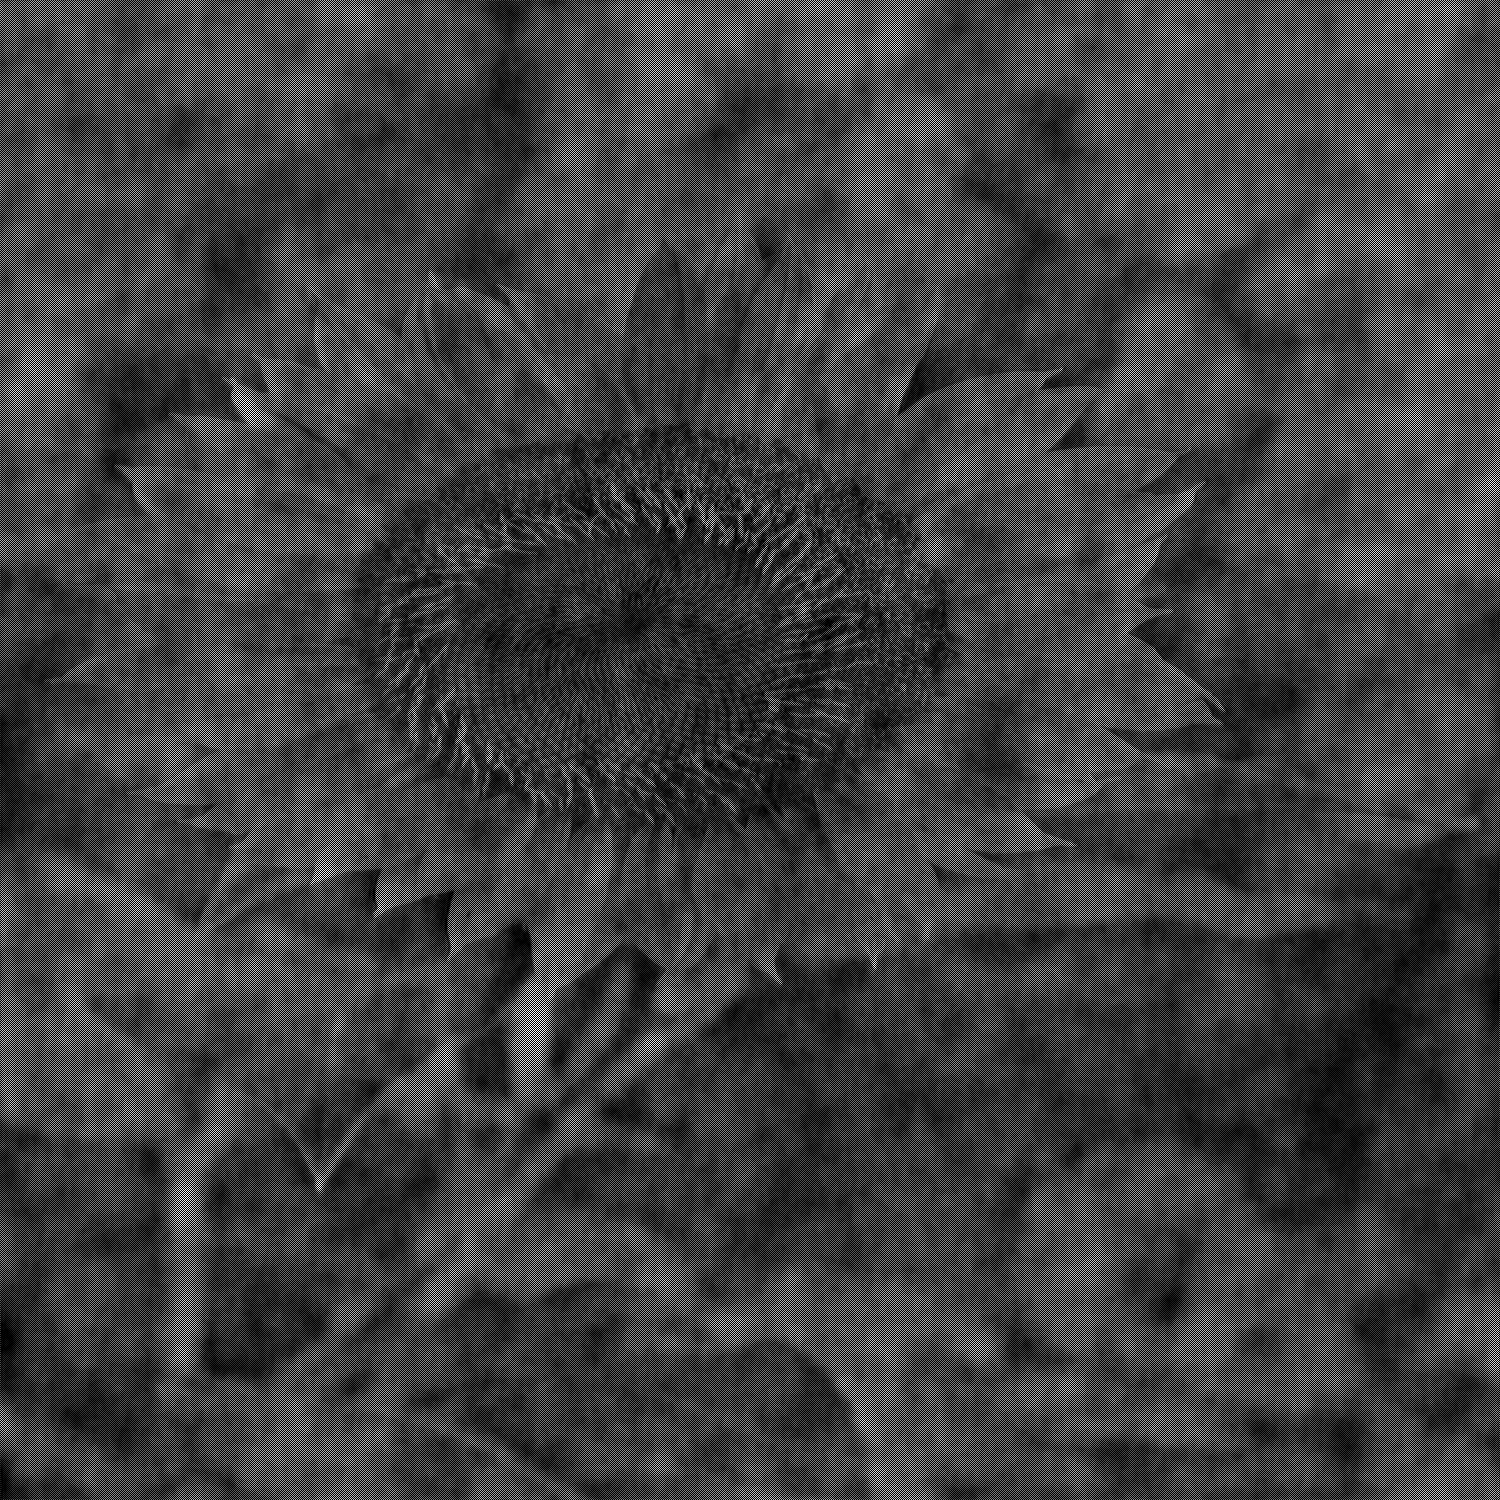

In [10]:
img1 = 'squirrel.jpg'
img2 = 'flower.jpg'
status = 0
photo = Main(img1, img2, status, 400, 1200, 400, 1200, 400, 1200, 400, 1200)
photo

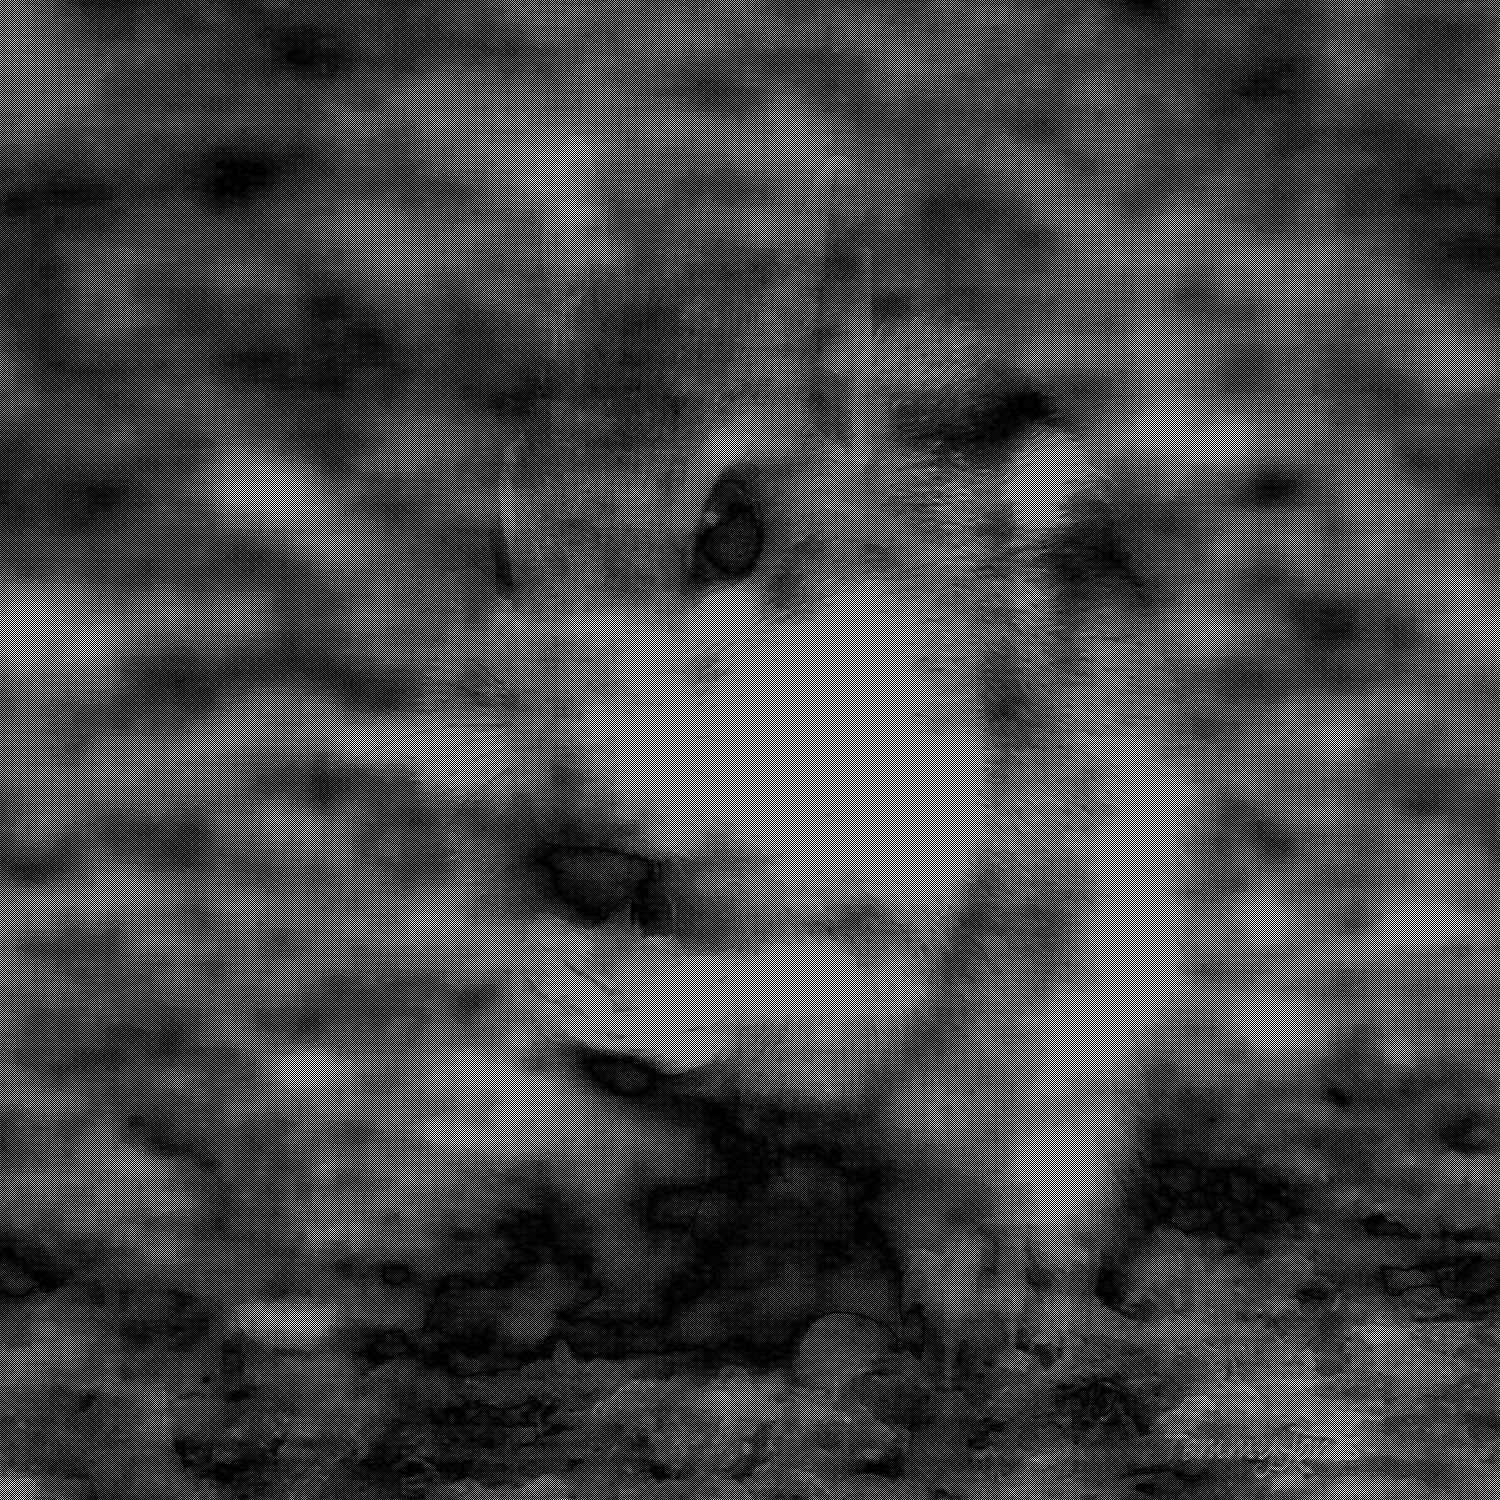

In [11]:
img1 = 'squirrel.jpg'
img2 = 'flower.jpg'
status = 1 
photo = Main(img1, img2, status, 100, 1000, 100, 1000, 100, 1000, 100, 1000)
photo